<font color='orange'>Objective:  Predict height of a person given the weight data.<br>


Implementation Methodology:  Using Numpy and Python without using scikit or built-in Machine Learning libraries </font>

<font color='green'>CSV file original datasource: https://raw.githubusercontent.com/Baakchsu/LinearRegression/master/weight-height.csv</font>

In [ ]:
import numpy as np
import pandas as pd

from tqdm import tqdm

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

**Connect G-Drive to obtain dataset bold text**

In [2]:
#Code to run on G-colab

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Set the Source/Path where Dataset is located in G-Drive**

In [3]:
#code to run only on G-colab 
gcolab_project_path = '/content/drive/My Drive/My AI Repository/Dataset/'
gcolab_project_path

'/content/drive/My Drive/My AI Repository/Dataset/'

**Read the csv file from the local repository**

In [4]:
df_wt_ht = pd.read_csv(gcolab_project_path + 'weight-height.csv')
df_wt_ht.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


**Check the dataset shape**

In [5]:
df_wt_ht.shape

(10000, 3)

**Build the Linear Regression as a class**

In [12]:
class LinearRegression:

    def __init__(self, X, Y, learning_rate, epochs):
        
        x_arr = np.array(X).reshape(-1,1)

        num_var = x_arr.shape[1]             #Shape[1] corresponds to number of features use to predict (i.e.) weight -only one
        print(f'num_var: {num_var}')

        #Initialize the internal instance attribute X and Y with Dataframe X and Y
        self._X = X
        self._Y = Y

        #Parameters Initialization with Numpy
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.parameter_cache = []
        self.weight_matrix_m = np.random.normal(-1,1,(num_var,1))       #weight matrix Shape corresponds to number of features use to predict (i.e.) weight -only one
        self.intercept = np.random.rand(1)                              #denotes the Y intercept of our linear regression model; just a single number
        

    def train_test_shuffle_split(self):

        len_dataset = len(self._X)   
        
        perm = np.random.permutation(len_dataset)    #Generates Random permutation for shuffling the dataset

        #Splits up the datset by 80:20%  (train vs test) by the generated Permutation number indices
        X_train, x_test =  self._X.iloc[perm][(len_dataset//5):], self._X.iloc[perm][:(len_dataset//5)]
        Y_train, y_test =  self._Y.iloc[perm][(len_dataset//5):], self._Y.iloc[perm][:(len_dataset//5)]

        X_train = np.array(X_train).reshape(-1,1)      #convert the train and test dataset of X & y into numpy arrays and reshape(data, one).  
        x_test = np.array(x_test).reshape(-1,1)        #since we have one feature(weight) vs predict(height)
        Y_train = np.array(Y_train).reshape(-1,1)
        y_test = np.array(y_test).reshape(-1,1)

        return X_train, x_test, Y_train, y_test 
    
    #fit method to train the model  
    def fit(self, x_train, y_train):

        #Train our model with back propagation
        for i in tqdm(range(self.epochs)):

            #partial derivative of Cost/Loss w.r.t the slope (m)
            self.costdm = np.sum(np.multiply(((np.matmul(x_train,self.weight_matrix_m) + self.intercept) -y_train),x_train))*2/x_train.shape[0]    
            
            #partial derivative of Cost/Loss w.r.t the intercept (c)
            self.costdc = np.sum(((np.matmul(x_train,self.weight_matrix_m)+self.intercept)-y_train))*2/ x_train.shape[0]                   
            
            #updating the weights with the calculated gradients
            self.weight_matrix_m -= self.learning_rate * self.costdm                                                                     
            
            #updating the intercepts with the calculated gradients
            self.intercept -= self.learning_rate * self.costdc                                                                         
            
            #appends the updated m and c in the list object / Caches the parameters 
            self.parameter_cache.append(np.array((self.weight_matrix_m,self.intercept)))                                
        
        print('Model completed the training...')
        return self.weight_matrix_m,self.intercept,self.parameter_cache
        
        
    def predict(self,x_test):
        
          # Predicts the model using the input feature and the trained weights of m and c 
          prediction = np.matmul(np.array(x_test).reshape(-1,1),self.weight_matrix_m)+self.intercept
          
          return prediction


    def visualize_model(self, title, graph_size, x_train, y_train, x_test, prediction):
      
          plt.figure(figsize=graph_size)

          plt.scatter(x_train,y_train)
          plt.plot(x_test,prediction)

          plt.title(title)

          return plt

    def visualize_model_performance(self, title, graph_size, x_test, y_test, prediction):

          plt.figure(figsize=(19, 10))
          plt.scatter(x_test,y_test)

          for iter in list(np.arange(0,self.epochs, 5)):

            value = self.parameter_cache[iter]
            prediction = np.matmul(x_test,value[0])+value[1]
           
            plt.plot(x_test,prediction)

          plt.title('The models improvement over its predictive performance as it trains.')

          return plt


**Extract only the required feature as well as target and Standardize the dataset**

In [7]:
#standardizes both weight and height dataset below. using the mathematical formula X-u/std
#helps the model learn faster as all the variables will be in the range ( -1 to 1)
#centers the mean to 0 and unit standard deviation (std=1).

X = ( df_wt_ht["Weight"]-df_wt_ht["Weight"].mean() )  / df_wt_ht["Weight"].std()    

Y = ( df_wt_ht["Height"]-df_wt_ht["Height"].mean() ) / df_wt_ht["Height"].std() 

**X, Y feature and target datashape**

In [8]:
X.shape, Y.shape, type(X), type(Y)

((10000,), (10000,), pandas.core.series.Series, pandas.core.series.Series)

**Invoke the Linear Regression**

In [13]:
learning_rate, epochs = 0.1, 50

obj_LR = LinearRegression(X, Y, learning_rate, epochs)


#train_test_shuffle_split: shuffles and split dataset into train & test
X_train, x_test, Y_train, y_test = obj_LR.train_test_shuffle_split()

weight_matrix_m, intercept, parameter_cache = obj_LR.fit(X_train, Y_train)

prediction = obj_LR.predict(x_test) 

100%|██████████| 50/50 [00:00<00:00, 3425.10it/s]

num_var: 1
Model completed the training...


**Model Visualization**

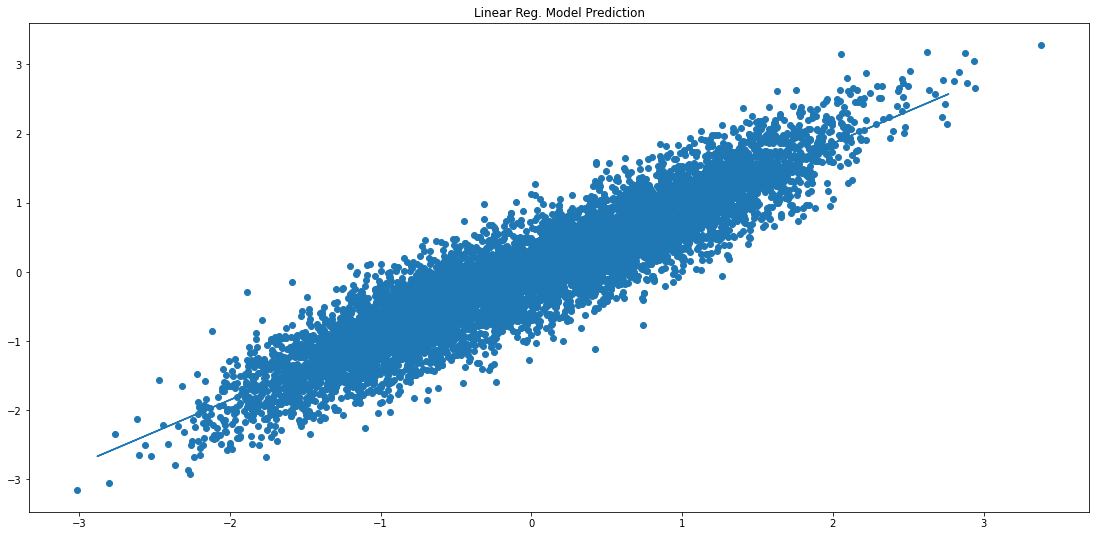

In [10]:
#Invoke visualize_model method of LinearRegression class to visualize the model prediction
plt = obj_LR.visualize_model('Linear Reg. Model Prediction', (19,9), X_train, Y_train, x_test, prediction)

plt.show()

**Visualize the model's fit during the course of training**

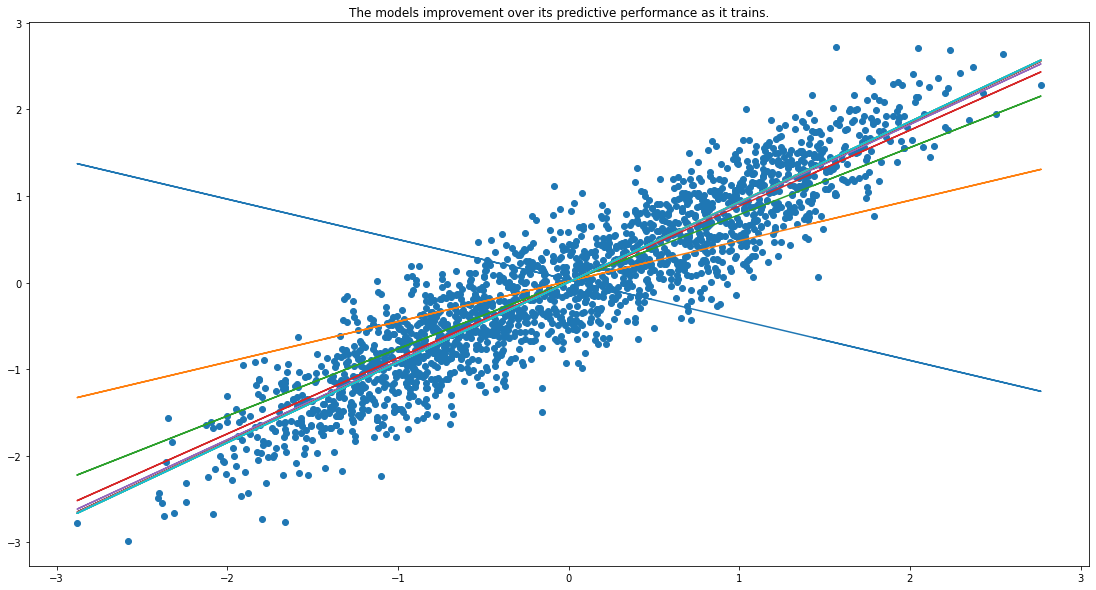

In [11]:
plt_model_prfrm = obj_LR.visualize_model_performance('Models improvement over its prediction as Training Progress', (19,9), x_test, y_test, prediction)
plt_model_prfrm.show()